# **Stock Price Prediction and Risk Analysis**

-------

## Introduction
In this notebook, we perform a comprehensive analysis of stock market data for leading technology companies including Apple (AAPL), Google (GOOGL), Amazon (AMZN), and Microsoft (MSFT). The analysis includes historical data exploration, statistical analysis, technical indicators, portfolio risk assessment, and predictive modeling using Long Short-Term Memory (LSTM) networks.

The goal is to understand stock behavior, assess risk and return, identify trends and patterns, and predict future stock prices based on historical trends.

## Project Overview
This project is divided into several key steps:

1. **Data Collection** – Gather historical stock price data for multiple companies.
2. **Exploratory Data Analysis (EDA)** – Visualize price trends, distributions, and relationships between stocks.
3. **Statistical Analysis & Technical Indicators** – Calculate returns, cumulative returns, moving averages, Bollinger Bands, and volatility measures.
4. **Portfolio Risk Assessment** – Evaluate portfolio returns, volatility, correlation, covariance, and Value at Risk (VaR). Visualize the efficient frontier.
5. **Predictive Modeling (LSTM)** – Build and train LSTM models to predict future stock prices and evaluate their performance.
6. **Insights & Recommendations** – Summarize findings, assess investment risks, and provide actionable insights.

## Table of Contents

1. **Step 1: Setup and Data Collection**  
    - Import Libraries  
    - Define Tickers  
    - Download Historical Data  
    - Preview and Visualize Data  
2. **Step 2: Exploratory Data Analysis (EDA)**  
    - Summary Statistics  
    - Missing Values  
    - Correlation Analysis  
    - Visualizations  
3. **Step 3: Statistical Analysis & Technical Indicators**  
    - Daily and Log Returns  
    - Cumulative Returns  
    - Moving Averages (SMA & EMA)  
    - Bollinger Bands  
    - Rolling Statistics  
4. **Step 4: Portfolio Risk Assessment**  
    - Portfolio Returns  
    - Portfolio Volatility  
    - Covariance & Correlation Matrices  
    - Value at Risk (VaR)  
    - Risk vs Return Plots  
5. **Step 5: Predictive Modeling using LSTM**  
    - Data Preparation  
    - Sequence Creation  
    - LSTM Model Architecture  
    - Model Training & Validation  
    - Predictions & Evaluation  
6. **Step 6: Insights & Recommendations**  
    - Key Findings  
    - Investment Insights  
    - Limitations & Future Work  

#### 0.1 Importing Required Libraries

In [109]:
import pandas as pd
import numpy as np

import yfinance as yf

import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

import warnings
warnings.filterwarnings("ignore")

#### 0.2 Data Collection

In [110]:
def get_stock_data(ticker, start, end):
    """
    Function to fetch stock data from Yahoo Finance
    """
    stock_data = yf.download(ticker, start=start, end=end)
    stock_data = stock_data.stack(level=1).reset_index()
    return stock_data

In [111]:
# Companies to analyze
company_tickers = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

comp_name = {
    'AAPL': 'Apple',
    'GOOG': 'Google',
    'MSFT': 'Microsoft',
    'AMZN': 'Amazon'
}

start = "2015-09-01" # 1st September 2015
end = "2025-09-01" # 1st September 2025

# Download stock data
dfs = {}
for i, ticker in enumerate(company_tickers):
    dfs[ticker] = get_stock_data(ticker, start, end)

# Combine all dataframes into a single dataframe
data = pd.concat(dfs.values(), axis=0)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [112]:
data

Price,Date,Ticker,Close,High,Low,Open,Volume
0,2015-09-01,AAPL,24.207439,25.142297,24.126538,24.753523,307383600
1,2015-09-02,AAPL,25.245667,25.245667,24.524298,24.771497,247555200
2,2015-09-03,AAPL,24.802965,25.344553,24.728805,25.279382,212935600
3,2015-09-04,AAPL,24.555761,24.820938,24.384971,24.488345,199985200
4,2015-09-08,AAPL,25.238930,25.295111,24.791726,25.113084,219374400
...,...,...,...,...,...,...,...
2509,2025-08-25,AMZN,227.940002,229.600006,227.309998,227.350006,22633700
2510,2025-08-26,AMZN,228.710007,229.000000,226.020004,227.110001,26105400
2511,2025-08-27,AMZN,229.119995,229.869995,227.809998,228.570007,21254500
2512,2025-08-28,AMZN,231.600006,232.710007,228.020004,229.009995,33679600


In [113]:
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
data.rename_axis(columns={'Price': 'index'}, inplace=True)

In [114]:
data

index,Date,Ticker,Close,High,Low,Open,Volume
0,2015-09-01,AAPL,24.207439,25.142297,24.126538,24.753523,307383600
1,2015-09-02,AAPL,25.245667,25.245667,24.524298,24.771497,247555200
2,2015-09-03,AAPL,24.802965,25.344553,24.728805,25.279382,212935600
3,2015-09-04,AAPL,24.555761,24.820938,24.384971,24.488345,199985200
4,2015-09-08,AAPL,25.238930,25.295111,24.791726,25.113084,219374400
...,...,...,...,...,...,...,...
10051,2025-08-25,AMZN,227.940002,229.600006,227.309998,227.350006,22633700
10052,2025-08-26,AMZN,228.710007,229.000000,226.020004,227.110001,26105400
10053,2025-08-27,AMZN,229.119995,229.869995,227.809998,228.570007,21254500
10054,2025-08-28,AMZN,231.600006,232.710007,228.020004,229.009995,33679600


## Step 1: Data Cleaning
Before performing analysis, it's crucial to clean the data to ensure accuracy. We will check for:

1. Missing values
2. Duplicate rows
3. Correct data types
4. Consistency across tickers

In [115]:
print("DataFrame Shape:", data.shape, "\n\n"
      "Duplicated Rows:", data.duplicated().sum(), "\n\n"
      "Missing Values:", data.isnull().sum())

DataFrame Shape: (10056, 7) 

Duplicated Rows: 0 

Missing Values: index
Date      0
Ticker    0
Close     0
High      0
Low       0
Open      0
Volume    0
dtype: int64


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10056 entries, 0 to 10055
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    10056 non-null  datetime64[ns]
 1   Ticker  10056 non-null  object        
 2   Close   10056 non-null  float64       
 3   High    10056 non-null  float64       
 4   Low     10056 non-null  float64       
 5   Open    10056 non-null  float64       
 6   Volume  10056 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 550.1+ KB


## Step 2: Exploratory Data Analysis (EDA)

In this step, we explore the historical stock data to understand trends, volatility, and relationships among the stocks. This helps in identifying patterns and selecting features for predictive modeling.

We will focus on:
1. Plotting stock price trends over time
2. Visualizing trading volume
3. Analyzing daily returns
4. Understanding correlations between stocks
5. Examining basic statistics such as mean, standard deviation, and volatility

### Summary Statistics
We calculate basic descriptive statistics for each stock including mean, median, minimum, maximum, and standard deviation of closing prices.

In [117]:
# Summary statistics for each stock
data.groupby('Ticker').describe(include='number').T.loc['Close']

Ticker,AAPL,AMZN,GOOG,MSFT
count,2514.000000,2514.000000,2514.000000,2514.000000
mean,106.406282,113.853665,92.308416,207.690282
std,69.623036,56.326483,47.959524,133.487147
min,20.624046,24.103500,29.568739,36.440937
25%,40.114441,72.198248,51.940260,85.462910
50%,109.697029,102.425003,75.524815,200.138283
75%,167.553497,162.018501,133.208565,305.225540
max,258.103729,242.059998,213.529999,534.760925


### Closing Price

The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

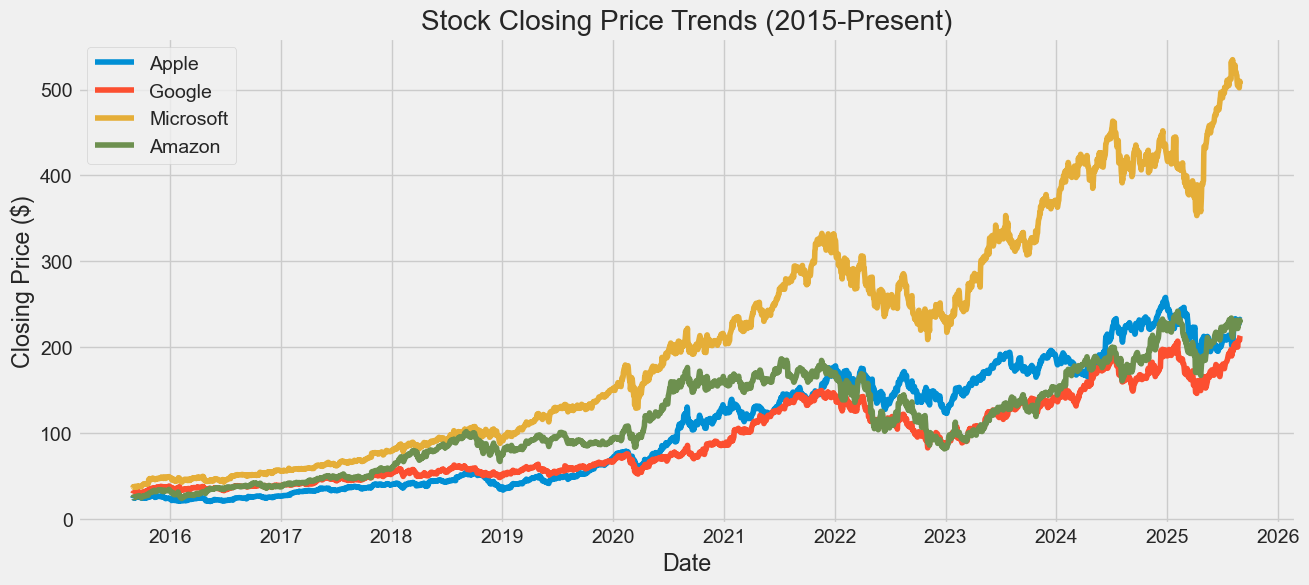

In [118]:
# Plotting the closing prices for all stocks
plt.figure(figsize=(14,6))
for ticker in company_tickers:
    comp_data = data[data['Ticker'] == ticker]
    plt.plot(comp_data['Date'], comp_data['Close'], label=comp_name[ticker])
plt.title('Stock Closing Price Trends (2015-Present)')
plt.xlabel('Date')
plt.ylabel('Closing Price ($)')
plt.legend()
plt.show()

### Volume of Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. Trading volume indicates market activity and liquidity. Sudden spikes in volume can hint at news events, earnings reports, or market shocks.

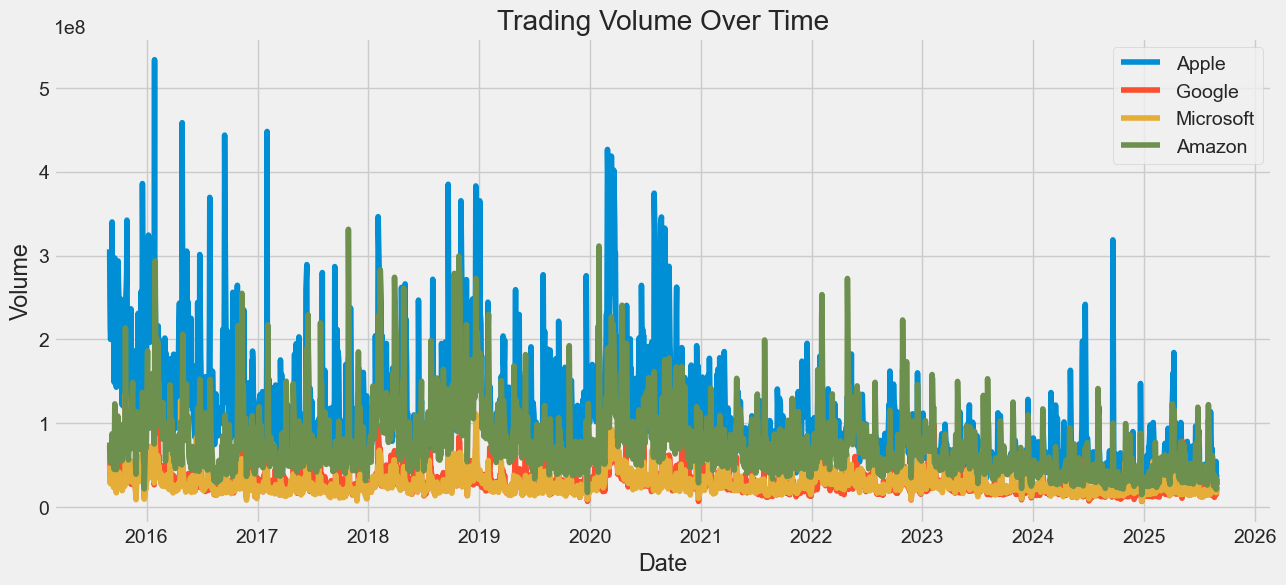

In [119]:
plt.figure(figsize=(14,6))
for ticker in company_tickers:
    comp_data = data[data['Ticker'] == ticker]
    plt.plot(comp_data['Date'], comp_data['Volume'], label=comp_name[ticker])
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.show()

### Daily return

In [12]:
# Pivot dataframe so that each Ticker has its own column for Close
close_prices = data.pivot(index="Date", columns="Ticker", values="Close")

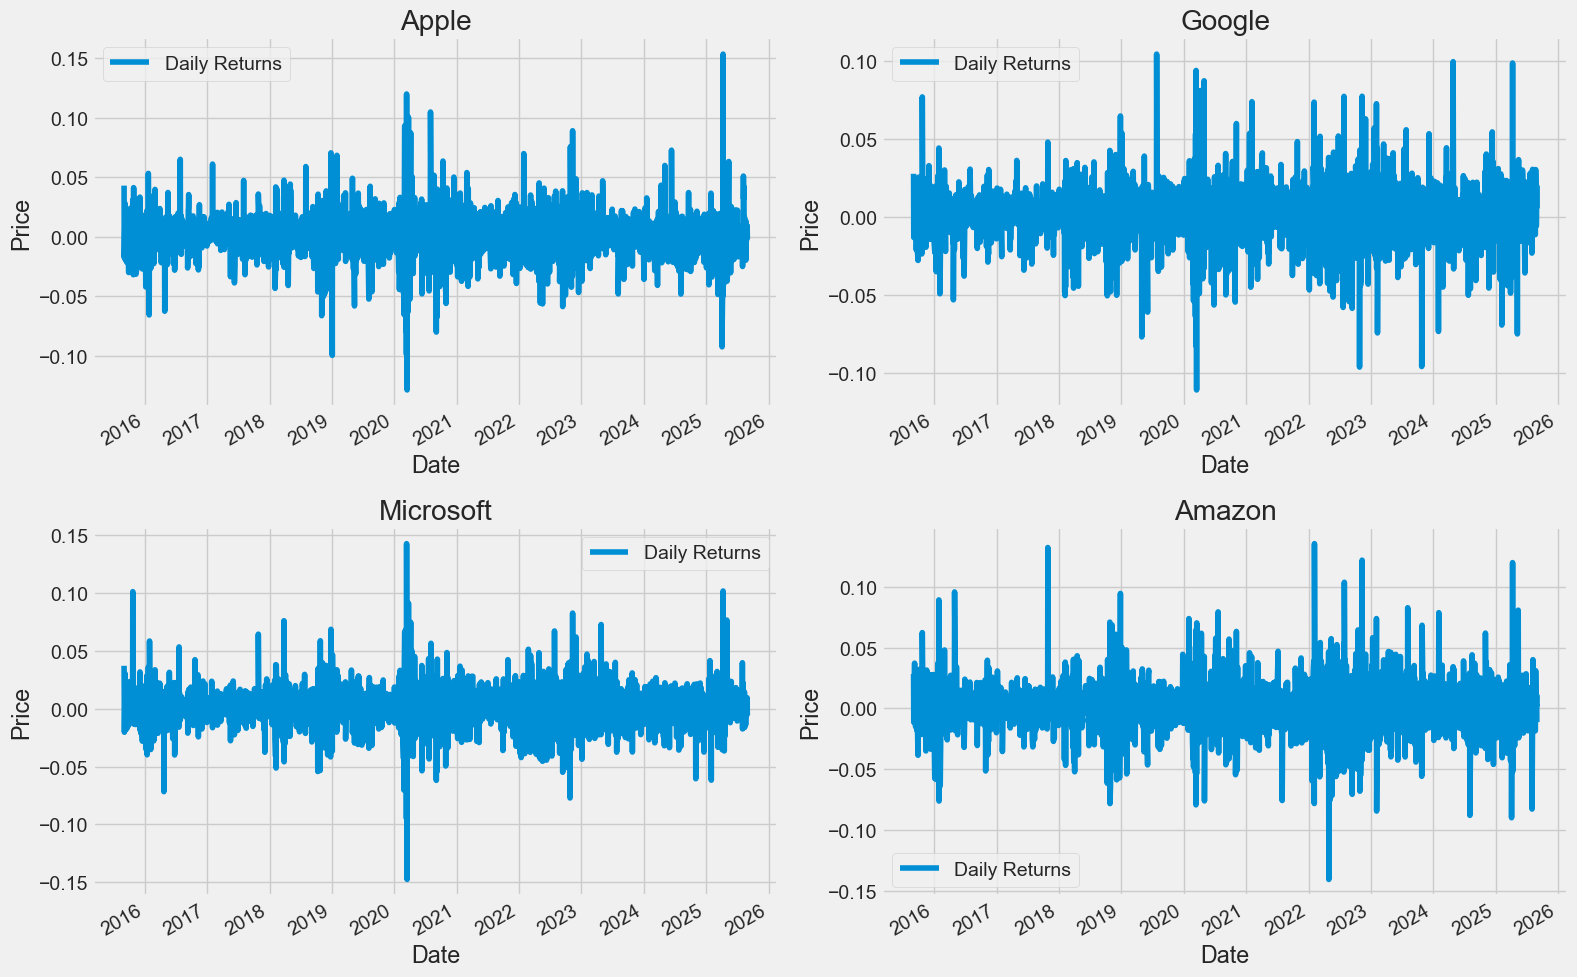

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharex=False)
axes = axes.flatten() 

for i, ticker in enumerate(company_tickers):
    close_prices[ticker].pct_change().plot(ax=axes[i], label='Daily Returns')

    axes[i].set_title(f"{comp_name[ticker]}")
    axes[i].set_xlabel("Date")
    axes[i].set_ylabel("Price")
    axes[i].legend()

plt.tight_layout()
plt.show()

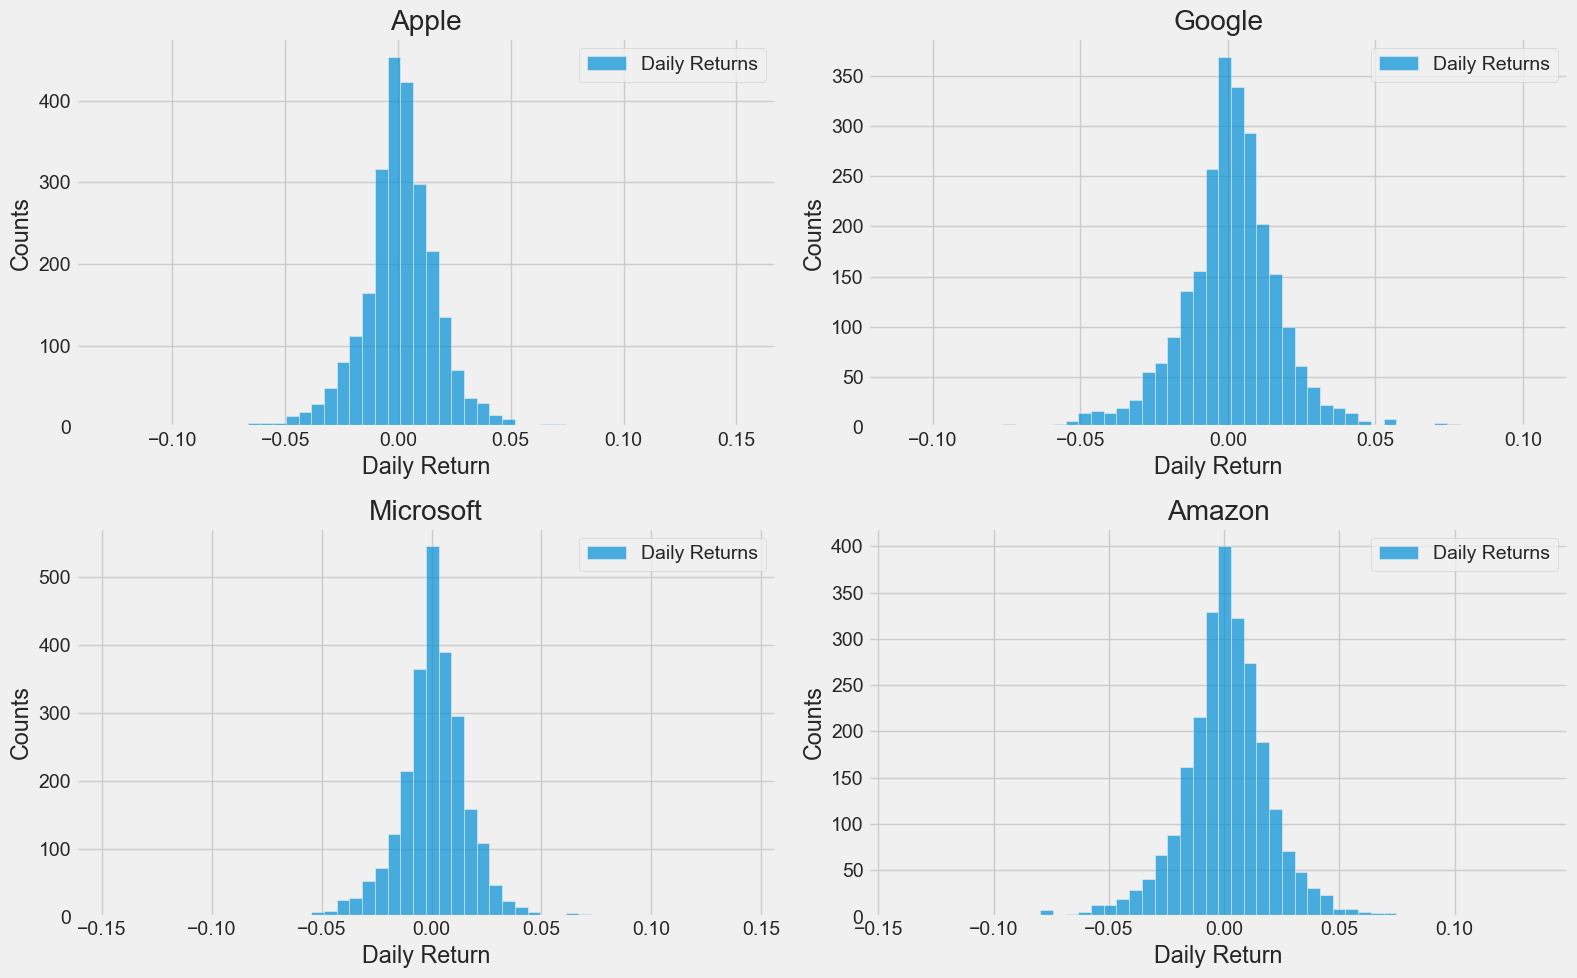

In [14]:
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharex=False)
axes = axes.flatten() 

for i, ticker in enumerate(company_tickers):
    axes[i].hist(close_prices[ticker].pct_change(), bins=50, alpha=0.7, label='Daily Returns')
    axes[i].set_title(f"{comp_name[ticker]}")
    axes[i].set_xlabel("Daily Return")
    axes[i].set_ylabel("Counts")
    axes[i].legend()

plt.tight_layout()
plt.show()

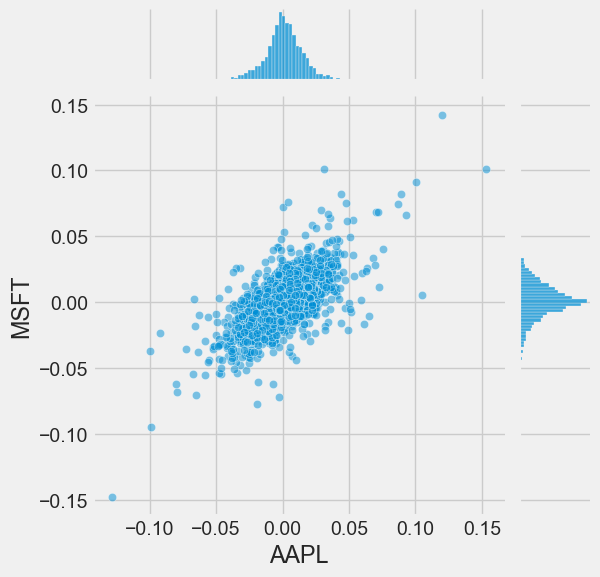

In [15]:
sns.jointplot(x=close_prices['AAPL'].pct_change(), 
                y=close_prices['MSFT'].pct_change(),
                kind='scatter', alpha=0.5)
plt.show()

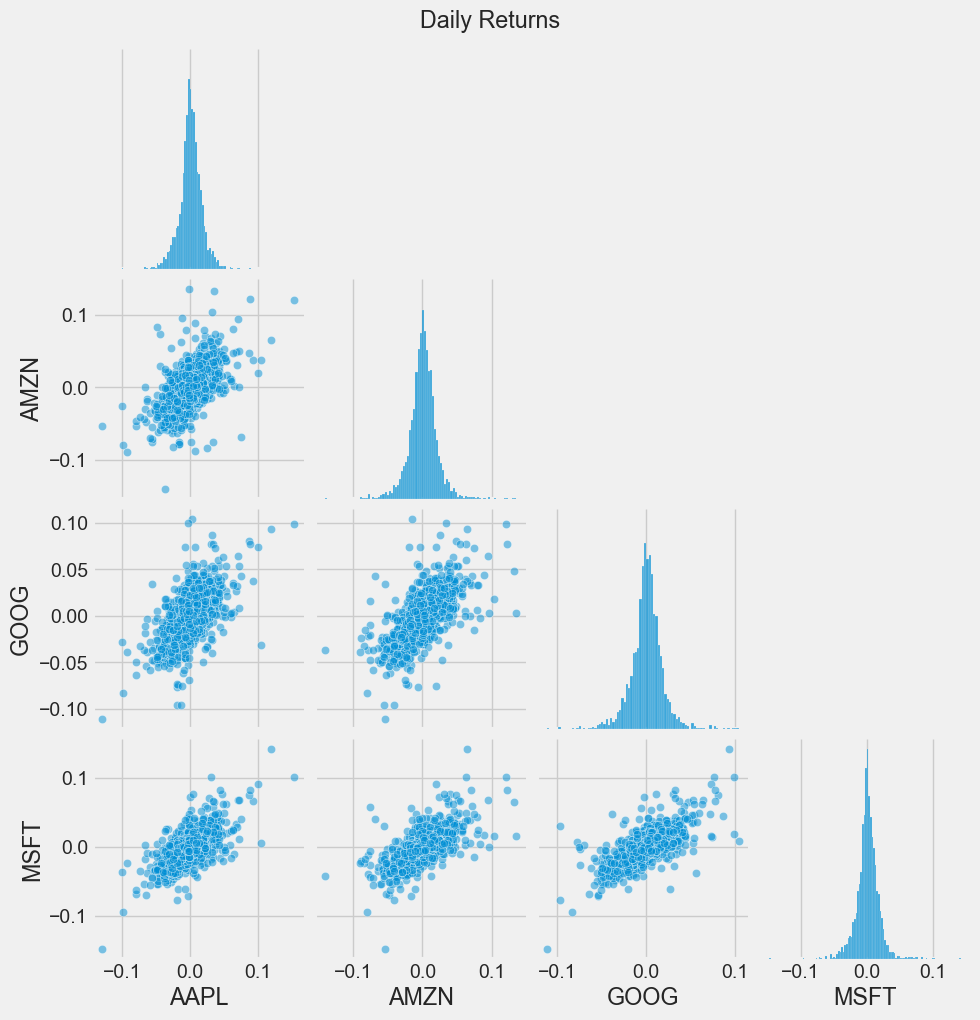

In [16]:
cp_plt = sns.pairplot(close_prices.pct_change().dropna(), corner=True,
             plot_kws={'alpha':0.5})
cp_plt.figure.suptitle('Daily Returns', y=1.02)
plt.show()

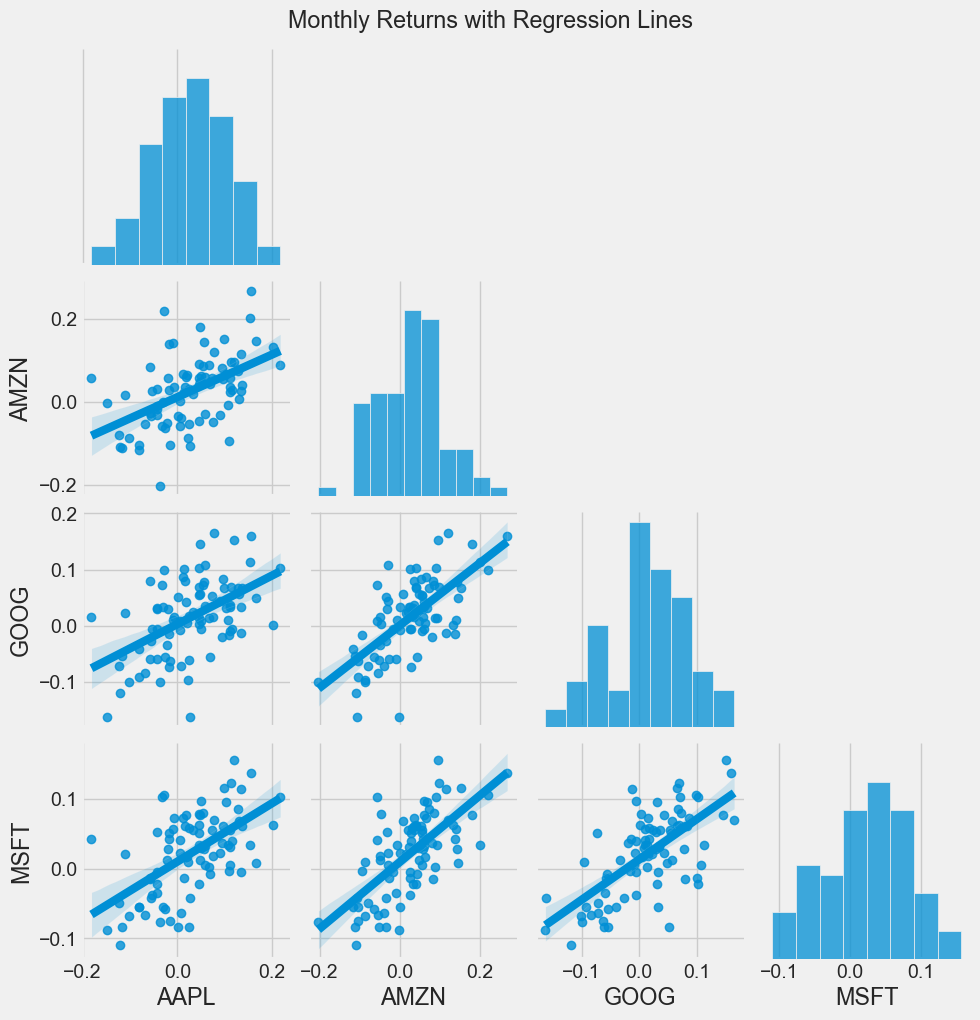

In [17]:
# Monthly returns
mr_plt = sns.pairplot(close_prices.pct_change(freq='M').dropna(), corner=True,
            #  plot_kws={'alpha':0.75},
             kind='reg')
mr_plt.figure.suptitle('Monthly Returns with Regression Lines', y=1.02)
plt.show()

### Correlation matrix

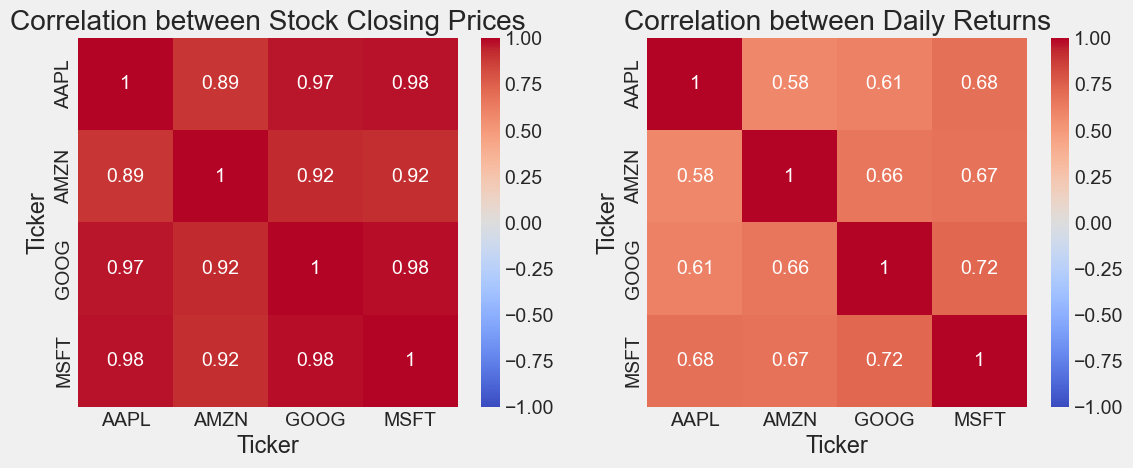

In [18]:
# Compute correlation
correlation = close_prices.corr()

plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(correlation, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Stock Closing Prices')


plt.subplot(2, 2, 2)
sns.heatmap(close_prices.pct_change().corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation between Daily Returns')
plt.show()

### Rolling Correlation

A rolling correlation measures how the relationship between two stocks’ prices changes over time. Instead of using all data at once, it looks at smaller time windows (e.g., 90 days) and recalculates correlation for each window. 

In short, rolling correlations help you see if two stocks are consistently linked, or only during certain market conditions.

In [19]:
rolling_days = 90

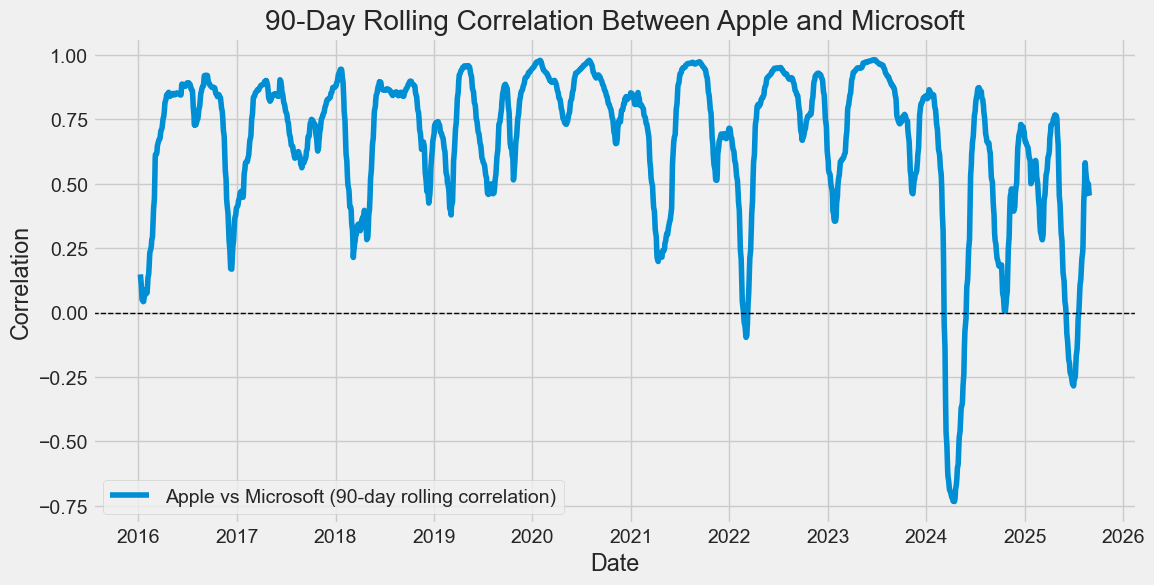

In [20]:
# Calculate rolling 90-day correlation between Apple and Microsoft
rolling_corr = close_prices['AAPL'].rolling(window=rolling_days).corr(close_prices['MSFT'])

plt.figure(figsize=(12,6))
plt.plot(rolling_corr, label="Apple vs Microsoft (90-day rolling correlation)")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.legend()
plt.title("90-Day Rolling Correlation Between Apple and Microsoft")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.show()

We observe that the two stocks tend to move in the same direction (mostly positive correlation), often close to 1.0. We also see an unusual dip in 2024, indicating temporary decoupling. This is valuable for risk management because diversification benefits are higher when correlations go negative.

Some of these negative correlations highlight how the shareholders react to the company decisions/event. While we don't usually expect tech giants to show uncorrelated behaviour, some events can lead to a drop of company's share prices and consequently leading to a dip in the correlation.

Note: The drop in Microsoft shares in early 2024 was because of a defective update from CrowdStrike, leading to a global outage of Microsoft computers.

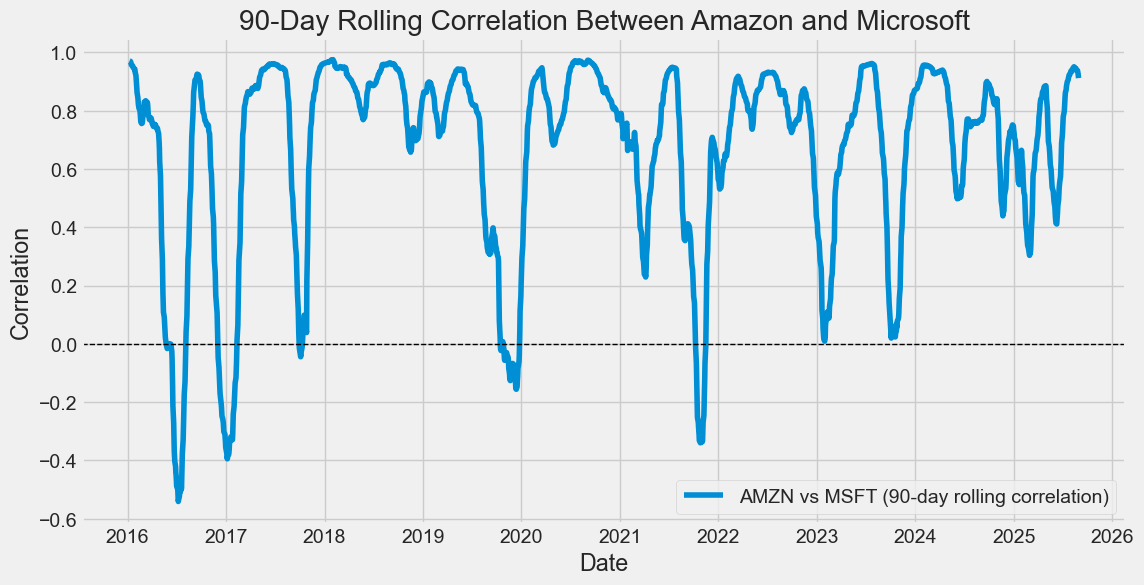

In [21]:
# Calculate rolling 90-day correlation between Amazon and Microsoft
rolling_corr = close_prices['AMZN'].rolling(window=rolling_days).corr(close_prices['MSFT'])

plt.figure(figsize=(12,6))
plt.plot(rolling_corr, label="AMZN vs MSFT (90-day rolling correlation)")
plt.axhline(0, color="black", linewidth=1, linestyle="--")
plt.legend()
plt.title("90-Day Rolling Correlation Between Amazon and Microsoft")
plt.xlabel("Date")
plt.ylabel("Correlation")
plt.show()

We see that Microsoft and Amazon also have positive correlation (largely). However, they vary highly as compared to its correlation with Apple. That is, there are a lot of times when these stocks vary inversely (benefits diversification). 

### Moving average

The moving average (MA) is a simple technical analysis tool that smooths out price data by creating a constantly updated average price. A moving average smooths out daily price noise by taking the average of the last N days/weeks/months. It is important because:
1. **Trend detection**: helps you see if the stock is in an uptrend or downtrend.
2. **Noise reduction**: filters out daily fluctuations that may not matter.
3. **Support/resistance**: prices often “bounce” around moving averages, especially longer ones.
4. **Trading signals**: crossovers (short-term MA crossing above/below long-term MA) are widely used strategies.

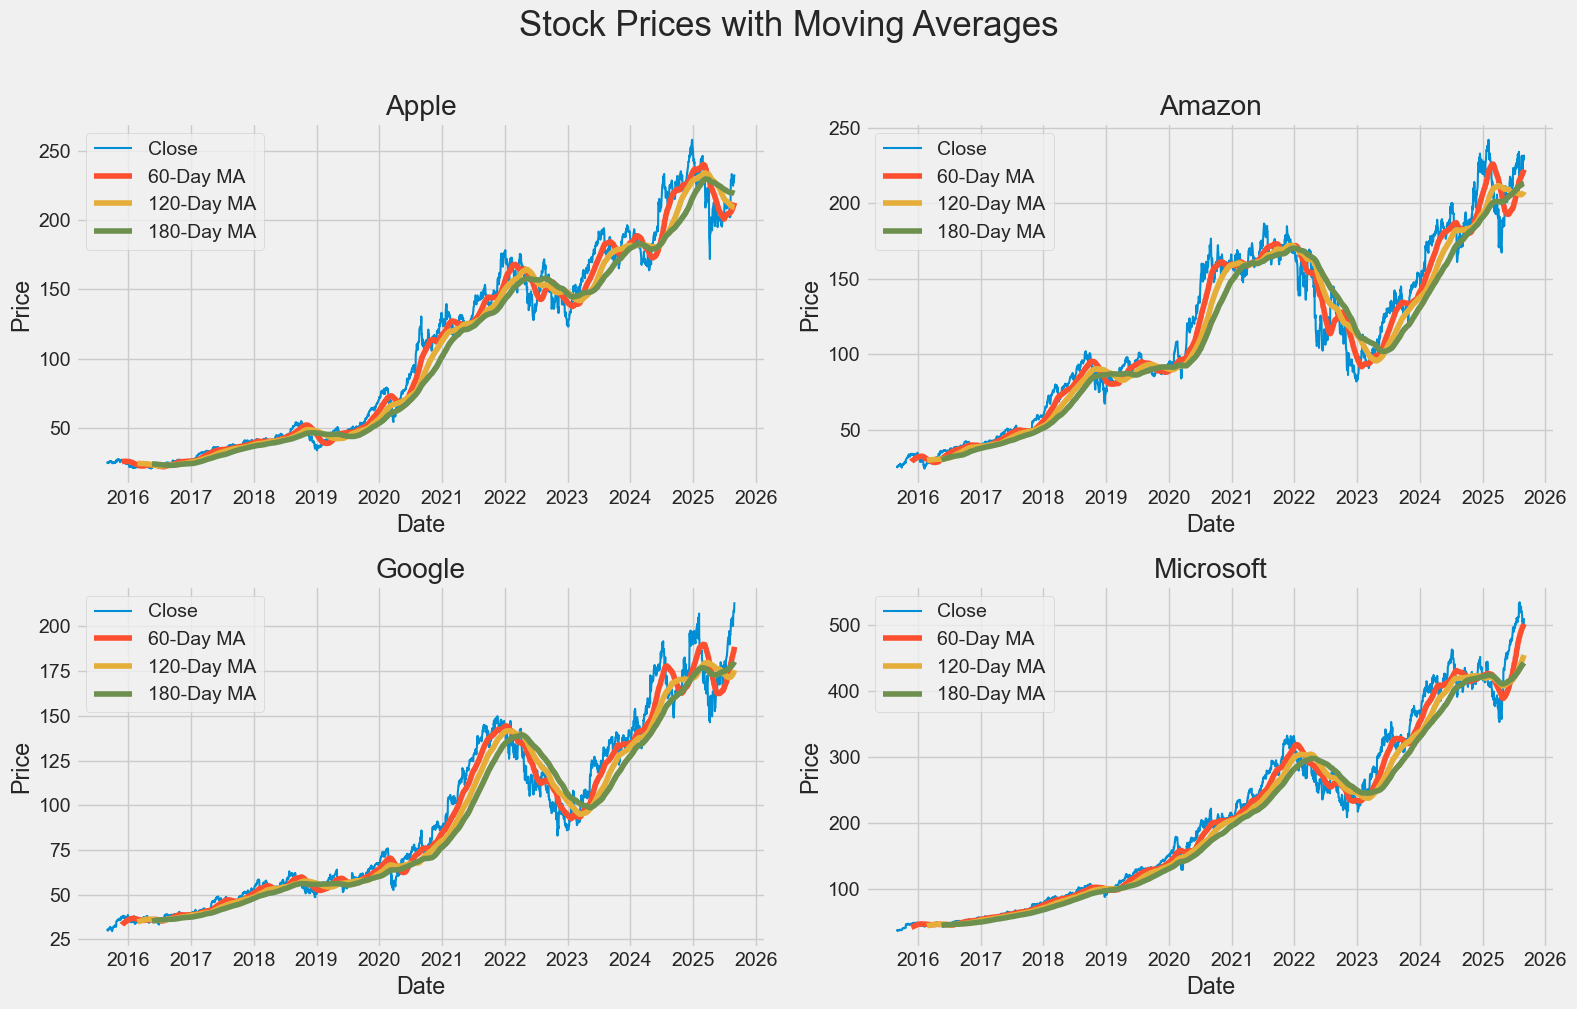

In [22]:
# Define moving average windows
ma_windows = [60, 120, 180] # Days

# Create 2x2 subplot
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharex=False)
axes = axes.flatten()  # make it easier to loop

for i, ticker in enumerate(close_prices.columns):
    ax = axes[i]
    
    # Plot closing price
    ax.plot(close_prices.index, close_prices[ticker], label="Close", linewidth=1.5)
    
    # Plot moving averages
    for w in ma_windows:
        ax.plot(close_prices.index,
                close_prices[ticker].rolling(window=w).mean(),
                label=f"{w}-Day MA")
    
    # Add padding between subplots
    plt.subplots_adjust(hspace=1, wspace=0.2)
    
    ax.set_title(f"{comp_name[ticker]}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    ax.legend()

fig.suptitle("Stock Prices with Moving Averages", fontsize=25, y=1.01)
plt.tight_layout()
plt.show()

If the short-term MA is above the long-term, it signals bullish momentum (trend up).
If the short-term MA dips below the long-term, it can suggest weakening momentum or even a bearish trend.

The distance between MAs tells you how strong the trend is:
* Wide gap = strong trend
* Lines converging = trend losing strength

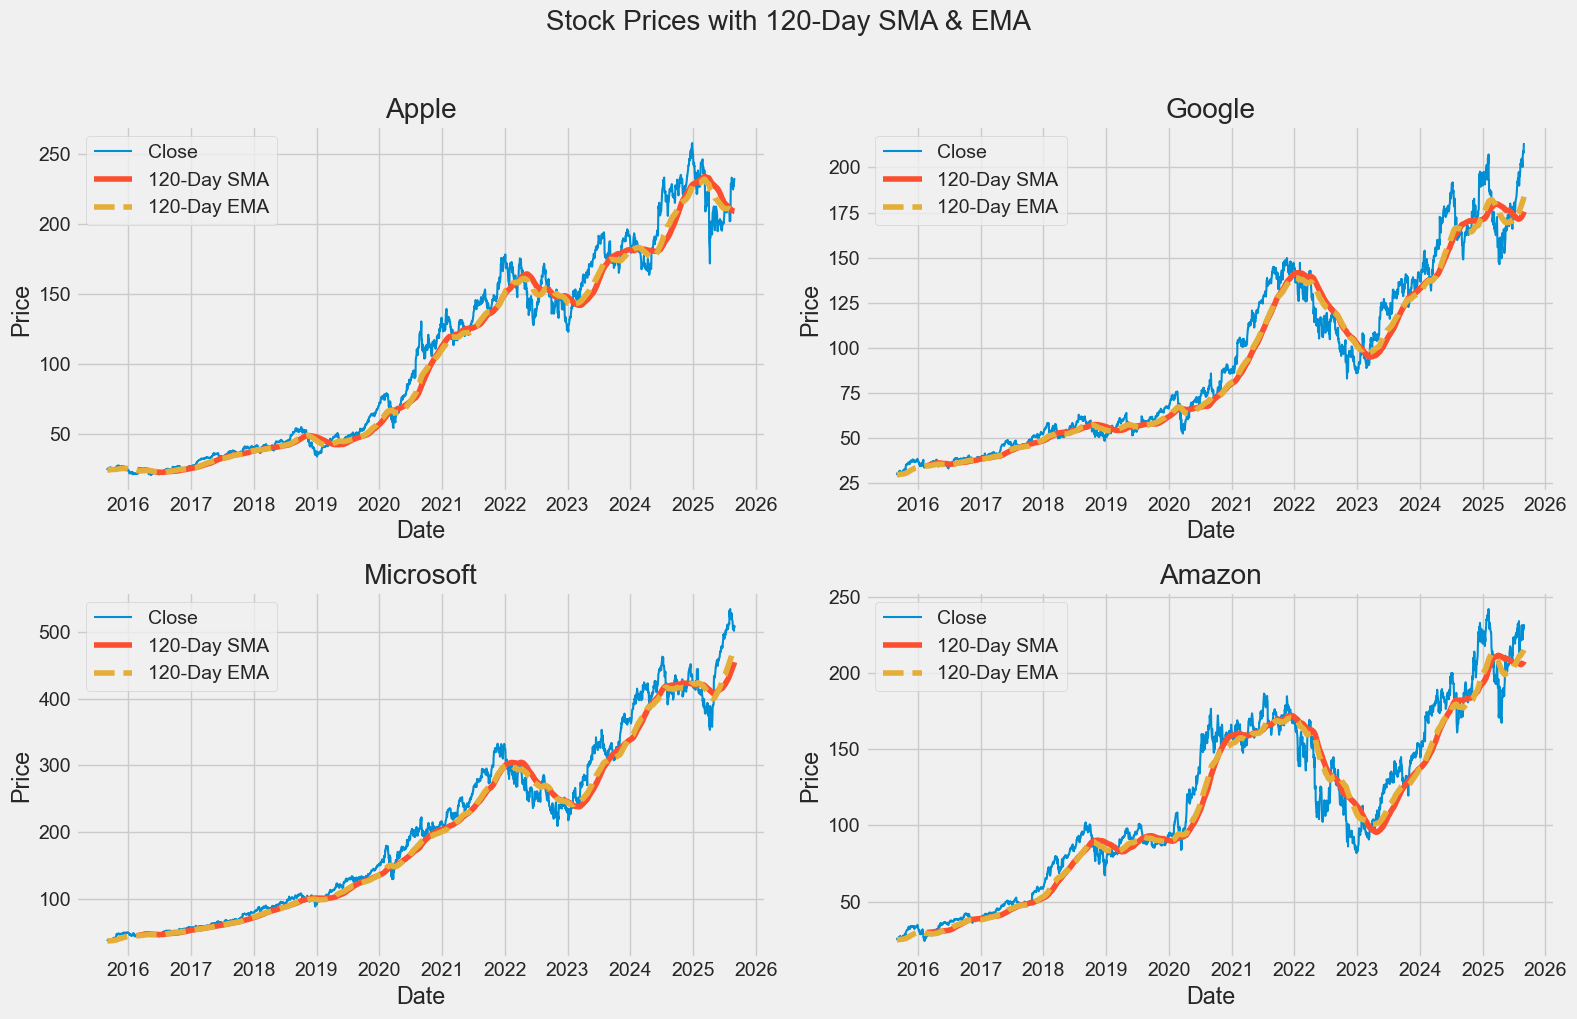

In [23]:
w = 120

fig, ax = plt.subplots(2,2, figsize=(16,10))

for i, ticker in enumerate(company_tickers):
    ax[i//2, i%2].plot(close_prices[ticker], label="Close", linewidth=1.5)

    ax[i//2, i%2].plot(close_prices.index,
            close_prices[ticker].rolling(window=w).mean(),
            label=f"{w}-Day SMA")

    ax[i//2, i%2].plot(close_prices.index,
            close_prices[ticker].ewm(span=w, adjust=False).mean(),
            label=f"{w}-Day EMA", linestyle='--')

    ax[i//2, i%2].set_title(f"{comp_name[ticker]}")
    ax[i//2, i%2].set_xlabel("Date")
    ax[i//2, i%2].set_ylabel("Price")
    ax[i//2, i%2].legend()

fig.suptitle(f"Stock Prices with {w}-Day SMA & EMA", fontsize=20, y=1.02)
plt.tight_layout()
plt.show()

Note: 
* SMA (Simple Moving Average) smooths price over a window to show trend.
* EMA (Exponential Moving Average) gives more weight to recent prices, more responsive to recent trends.

## Step 3: Statistical Analysis & Technical Indicators

In this step, we will:
1. Analyze stock volatility and risk through returns
2. Compute cumulative returns
3. Examine moving averages (SMA and EMA)
4. Calculate Bollinger Bands to visualize price deviations
5. Explore rolling statistics like rolling mean and rolling standard deviation

These analyses provide insights into trends, risk, and potential entry/exit points.

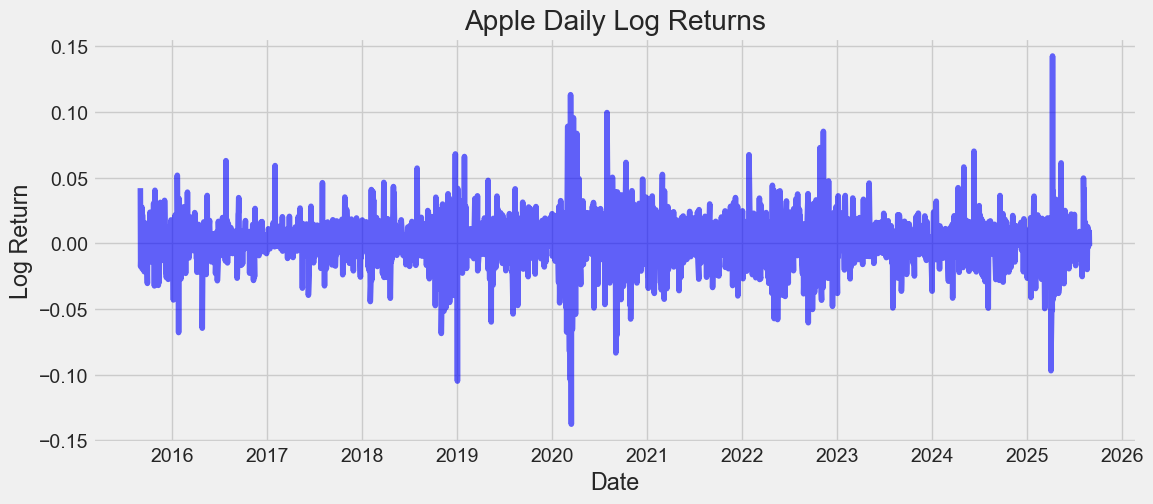

In [24]:
# Daily and Log returns
daily_returns = {ticker: close_prices[ticker].pct_change() for ticker in company_tickers}
log_returns = {ticker: np.log(close_prices[ticker]/close_prices[ticker].shift(1)) for ticker in company_tickers}

# Plot log returns for Apple
plt.figure(figsize=(12,5))
plt.plot(log_returns['AAPL'], color='blue', alpha=0.6)
plt.title('Apple Daily Log Returns')
plt.xlabel('Date')
plt.ylabel('Log Return')
plt.show()

### Cumulative Returns

Shows growth of $1 invested in each stock since the start date.
Highlights relative performance across stocks.

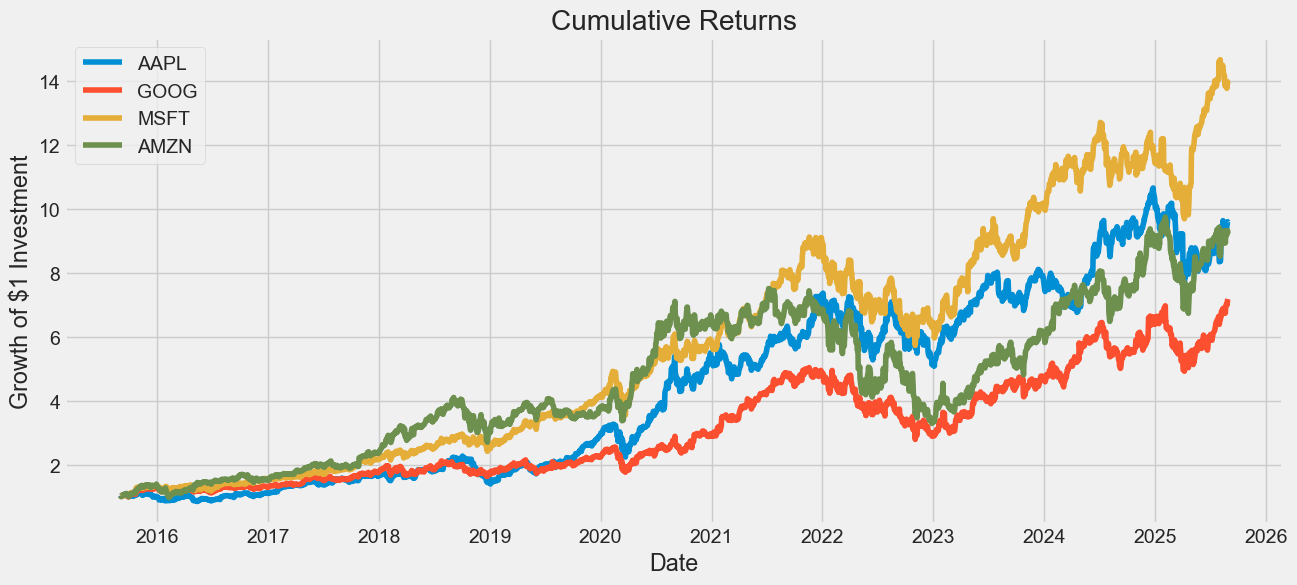

In [25]:
cumulative_returns = {ticker: (1 + daily_returns[ticker]).cumprod() for ticker in company_tickers}

plt.figure(figsize=(14,6))
for ticker in company_tickers:
    plt.plot(cumulative_returns[ticker], label=ticker)
plt.title('Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1 Investment')
plt.legend()
plt.show()

### Bollinger Bands

Bollinger Bands measure how far prices deviate from the moving average.  
- Upper Band = SMA + 2 × Std  
- Lower Band = SMA - 2 × Std

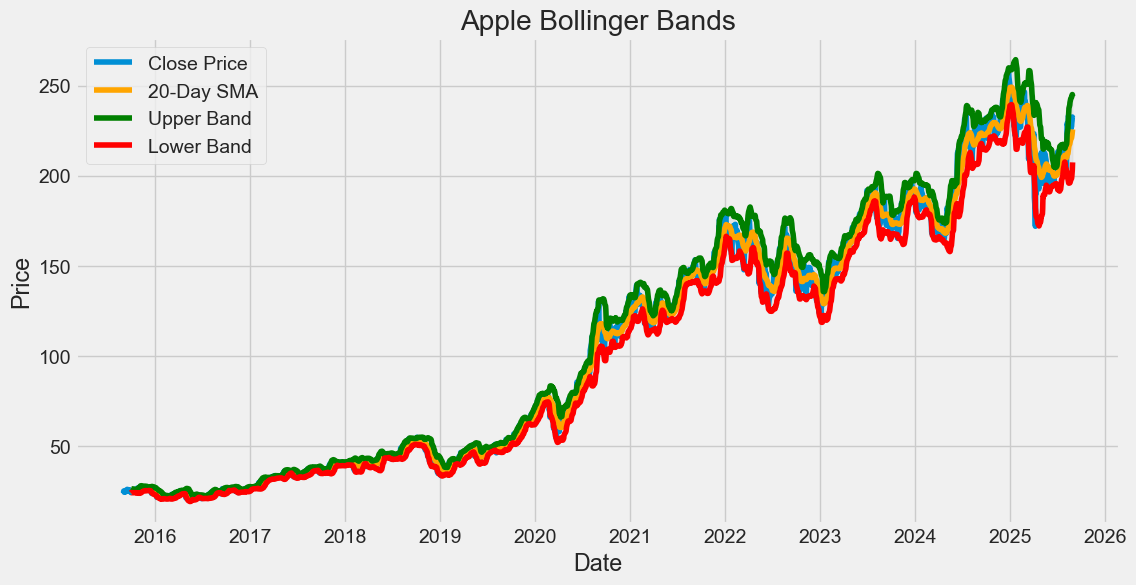

In [26]:
# Bollinger Bands: 20-day SMA +/- 2 std
rolling_mean = close_prices['AAPL'].rolling(window=20).mean()
rolling_std = close_prices['AAPL'].rolling(window=20).std()

upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

plt.figure(figsize=(12,6))
plt.plot(close_prices['AAPL'], label='Close Price')
plt.plot(rolling_mean, label='20-Day SMA', color='orange')
plt.plot(upper_band, label='Upper Band', color='green')
plt.plot(lower_band, label='Lower Band', color='red')
plt.fill_between(close_prices['AAPL'].index, lower_band, upper_band, color='grey', alpha=0.1)
plt.title('Apple Bollinger Bands')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Price touching upper/lower bands can indicate potential overbought/oversold conditions.

## Step 4: Portfolio Risk Assessment

In this section, we will analyze the risk and return characteristics of a portfolio consisting of Apple, Google, Amazon, and Microsoft. 

We will cover:
1. Portfolio returns
2. Portfolio volatility
3. Covariance and correlation matrices
4. Value at Risk (VaR)
5. Visualizing the Efficient Frontier

#### Portfolio returns

* Portfolio returns = weighted sum of individual stock returns.
* Cumulative returns show growth of an initial investment in the portfolio.

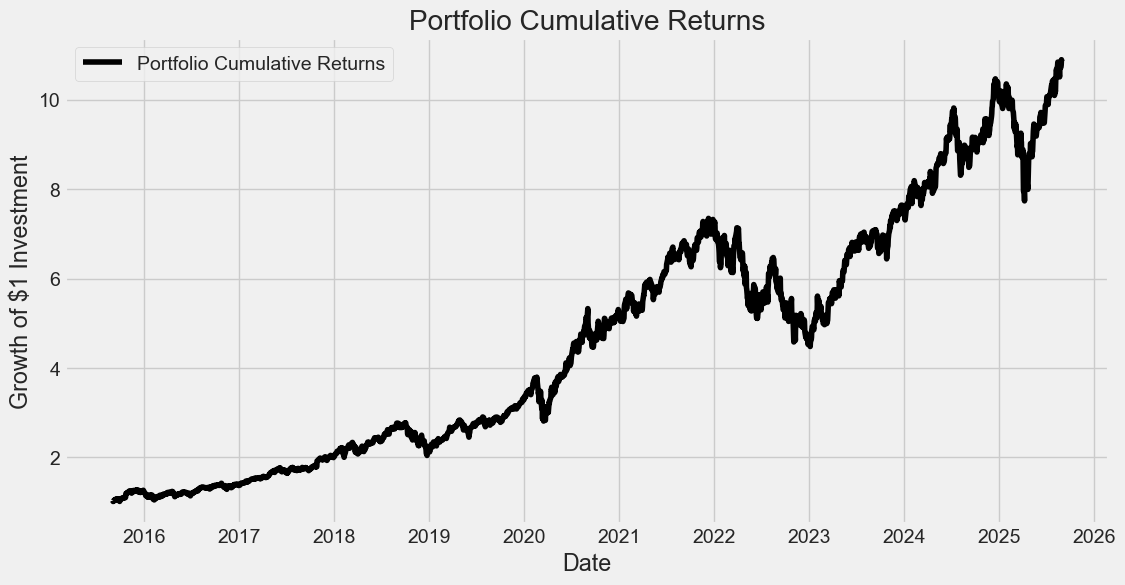

In [27]:
# Assign weights to each stock in the portfolio
weights = np.array([0.25, 0.25, 0.25, 0.25])

# Combine daily returns into a DataFrame
returns_df = pd.DataFrame(daily_returns)

# Portfolio daily returns
portfolio_returns = returns_df.dot(weights)

# Cumulative portfolio returns
portfolio_cumulative = (1 + portfolio_returns).cumprod()

plt.figure(figsize=(12,6))
plt.plot(portfolio_cumulative, label='Portfolio Cumulative Returns', color='black')
plt.title('Portfolio Cumulative Returns')
plt.xlabel('Date')
plt.ylabel('Growth of $1 Investment')
plt.legend()
plt.show()

### Portfolio Volatility

* Portfolio volatility accounts for both individual stock risk and correlation between them.
* Annualized volatility is derived from the covariance matrix of returns.
* Diversification can reduce overall risk if stocks are not perfectly correlated.

In [28]:
# Covariance matrix of returns
cov_matrix = returns_df.cov() * 252  # annualized

# Portfolio variance and volatility
portfolio_var = np.dot(weights.T, np.dot(cov_matrix, weights))
portfolio_vol = np.sqrt(portfolio_var)

print(f"Portfolio Annualized Volatility: {portfolio_vol:.2%}")

Portfolio Annualized Volatility: 25.27%


### Correlation Matrix
A correlation matrix shows how stocks move relative to each other.  
Diversification benefits are higher when correlations are lower or negative.

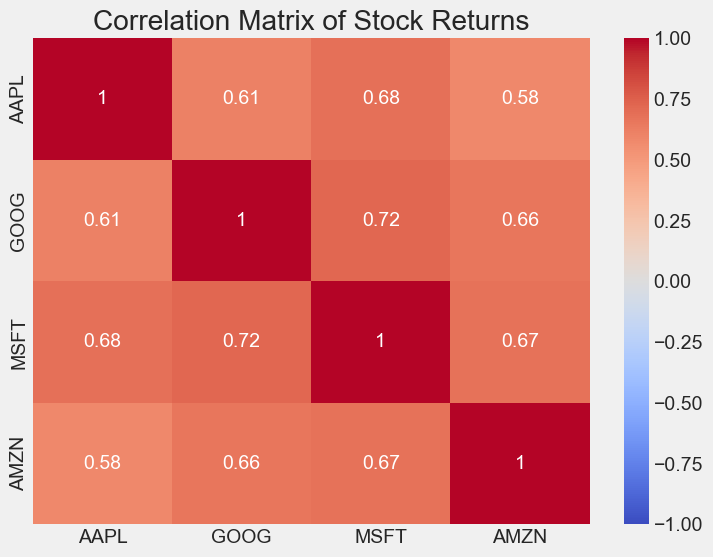

In [29]:
plt.figure(figsize=(8,6))
sns.heatmap(returns_df.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Stock Returns')
plt.show()

### Risk vs Return
We compare expected monthly returns (mean) against risk (standard deviation).  
This visualization helps evaluate the risk-return trade-off.

How much value do we put at risk by investing in a particular stock?

There are many ways we can quantify risk, one of the most basic ways using the information we've gathered on daily percentage returns is by comparing the expected return with the standard deviation of the daily returns.

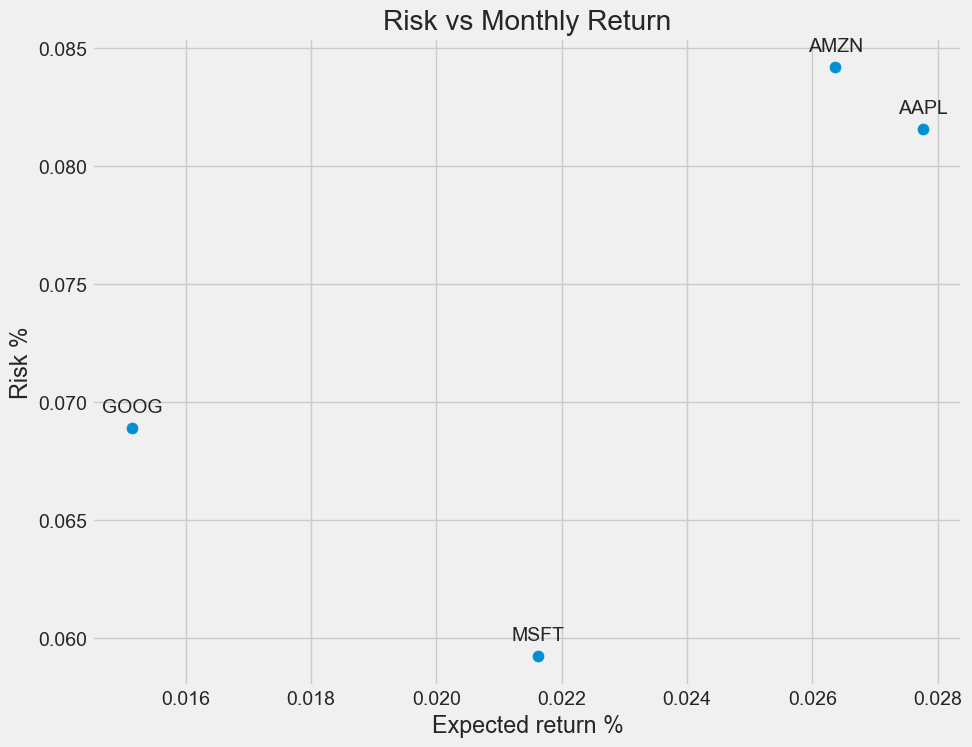

In [30]:
returns = close_prices.pct_change(freq='M').dropna()

area = np.pi * 20

plt.figure(figsize=(10, 8))
plt.scatter(returns.mean(), returns.std(), s=area)
plt.xlabel('Expected return %')
plt.ylabel('Risk %')

for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(label, xy=(x, y), xytext=(x, y + 5e-4), ha='center', va='bottom')

plt.title('Risk vs Monthly Return')
plt.show()

### Observations
- The equally weighted portfolio provides smoother cumulative returns than individual stocks.  
- Annualized portfolio volatility reflects combined risk, which is lower than individual stock volatilities due to diversification.  
- High correlation between tech giants limits diversification benefits, but some variation still exists (e.g., Amazon vs Microsoft).  
- Risk vs Return scatter plot highlights the trade-off: higher expected returns usually come with higher volatility.

## Step 5: Predictive Modeling using LSTM (Individual Stock)

Long Short-Term Memory (LSTM) networks are a type of recurrent neural network (RNN) that are highly effective for time series forecasting. 

We will:
1. Prepare the data (scaling and sequence creation)
2. Build the LSTM model
3. Train and validate the model
4. Evaluate predictions

### Data Preparation
We select **Apple (AAPL)** stock for prediction.  
- Scale the data for faster model convergence  
- Split into train (95%) and test (5%)  
- Create sequences of past prices as model input

In [31]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [209]:
# Selecting stock and features
stock = 'AAPL'
features = ['Close']
target_feature = 'Close'
seq_length = 60
test_split_ratio = 0.05 # 5% for testing

target_col = features.index(target_feature)
print(f"Target Feature: {target_feature}")

Target Feature: Close


In [210]:
# Filter data for the selected stock
stock_data = data[data['Ticker'] == stock].copy()
dataset = stock_data[features].values

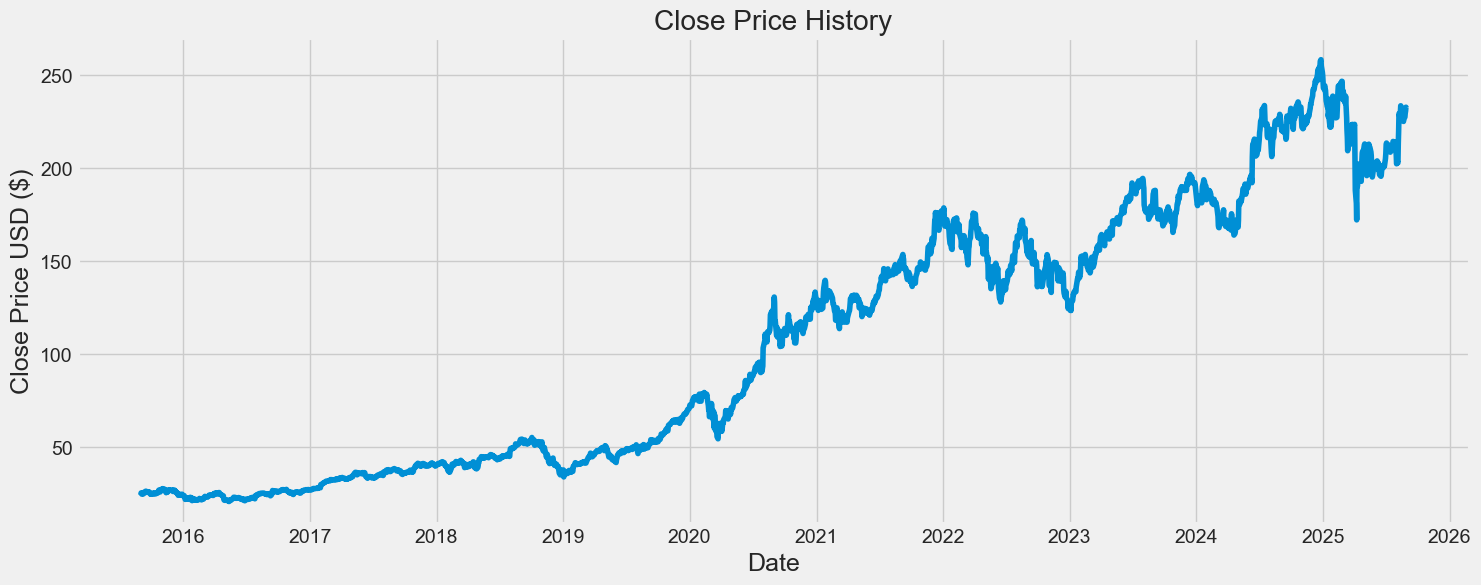

In [211]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(stock_data['Date'], stock_data[target_feature])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [212]:
feature_scaler = MinMaxScaler()
scaled_features = feature_scaler.fit_transform(dataset)

target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(stock_data[[target_feature]].values)

In [213]:
# Split into training and testing sets
train_size = int(len(dataset) * (1 - test_split_ratio))
train_features = scaled_features[:train_size]
test_features = scaled_features[train_size - seq_length:]  # include last seq_length rows from train

train_target = scaled_target[:train_size]
test_target = scaled_target[train_size - seq_length:]

print("Training Data Shape:", train_features.shape)
print("Testing Data Shape:", test_target.shape)

Training Data Shape: (2388, 1)
Testing Data Shape: (186, 1)


In [ ]:
def create_sequences(features, target, seq_length):
    """
    Converts input data into LSTM sequences.

    Args:
        features (np.array): Scaled data (samples, features)
        target_col (int): Column index of target variable
        seq_length (int): Number of past timesteps to include

    Returns:
        X (np.array): LSTM input sequences (samples, seq_length, features)
        y (np.array): Target values
    """
    X, y = [], []
    for i in range(seq_length, len(features)):
        X.append(features[i-seq_length:i, :])
        y.append(target[i, 0])
    return np.array(X), np.array(y)

In [215]:
X_train, y_train = create_sequences(train_features, train_target, seq_length)
X_test, y_test = create_sequences(test_features, test_target, seq_length)

Build LSTM Model

In [216]:
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1))

model.compile(optimizer=Adam(learning_rate=1e-3), loss='mean_squared_error')

In [217]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=16,
    validation_split=0.1,
    shuffle=False,
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)]
)

Epoch 1/50


E0000 00:00:1757287375.384816 8653382 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


131/131 ━━━━━━━━━━━━━━━━━━━━ 15s 92ms/step - loss: 0.0035 - val_loss: 0.0353
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0160 - val_loss: 0.0248
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 80ms/step - loss: 0.0122 - val_loss: 0.0146
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0212 - val_loss: 0.0359
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 11s 81ms/step - loss: 0.0107 - val_loss: 0.0149
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 0.0023 - val_loss: 0.0171
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 76ms/step - loss: 0.0033 - val_loss: 0.0036
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0016 - val_loss: 0.0055
Epoch 9/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 0.0013 - val_loss: 0.0055
Epoch 10/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 78ms/step - loss: 5.5322e-04 - val_loss: 0.0040
Epoch 11/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 10s 77ms/step - loss: 5.9930e-04 - val_loss: 0.0027
Epoch 12/50
131/131 ━━━━━━━━━━━━━

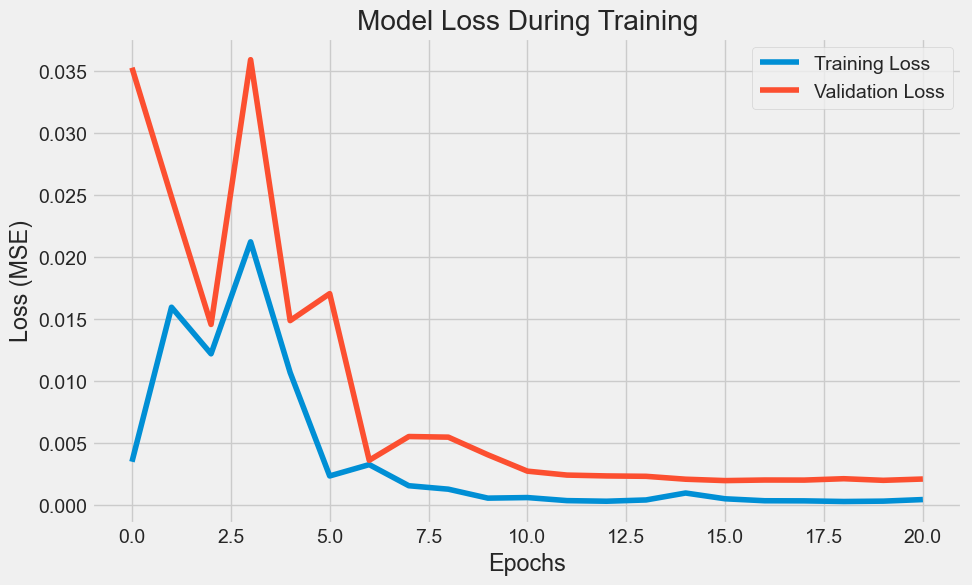

In [219]:
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [218]:
y_pred_scaled = model.predict(X_test)
y_pred = target_scaler.inverse_transform(y_pred_scaled)
y_true = target_scaler.inverse_transform(y_test.reshape(-1, 1))

E0000 00:00:1757287595.042004 8653382 meta_optimizer.cc:967] PluggableGraphOptimizer failed: INVALID_ARGUMENT: Failed to deserialize the `graph_buf`.


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 152ms/step


In [220]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_true, y_pred))
mae = mean_absolute_error(y_true, y_pred)

print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}")

RMSE: 8.15, MAE: 6.16


In [221]:
train = stock_data[:len(train_target)]
truth = stock_data[len(train_target):]

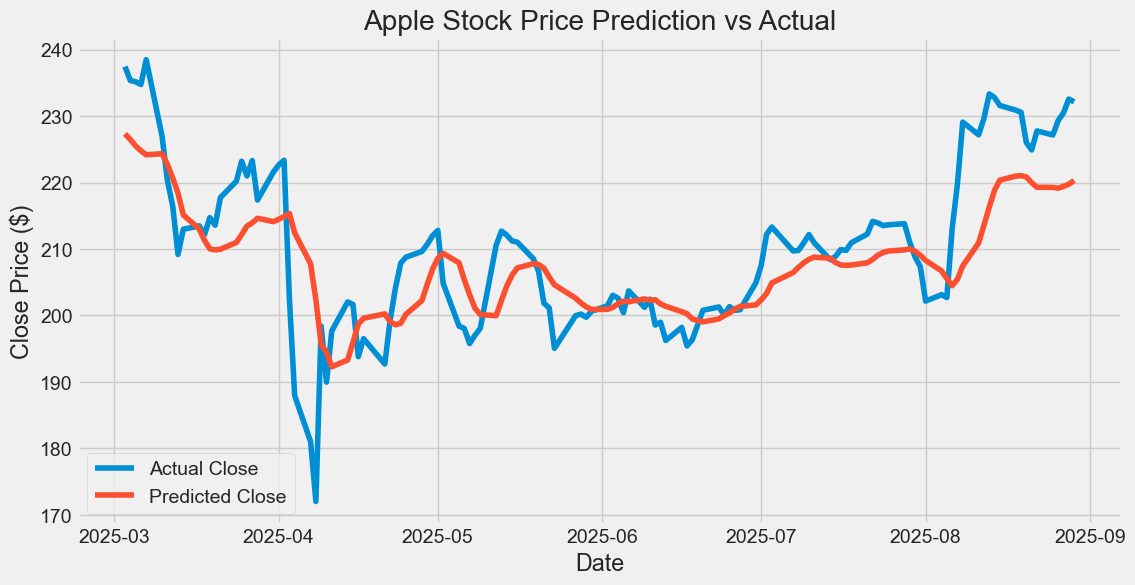

In [228]:
plt.figure(figsize=(12,6))
plt.plot(truth.Date, truth.Close, label='Actual Close')
plt.plot(truth.Date, y_pred, label='Predicted Close')
plt.title(f'{comp_name[stock]} Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

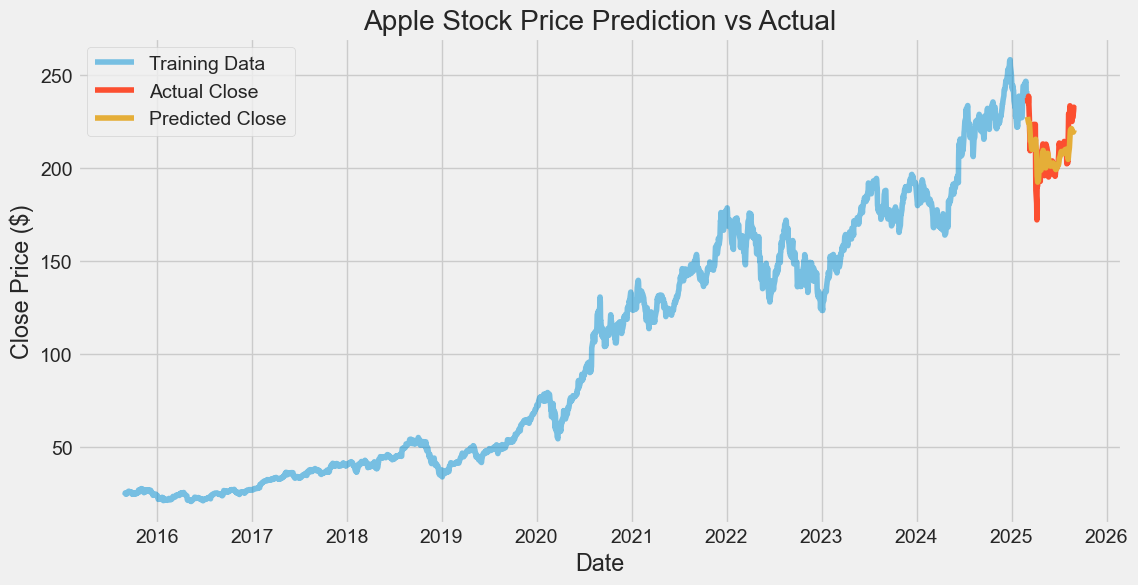

In [230]:
plt.figure(figsize=(12,6))
plt.plot(train.Date, train.Close, label='Training Data', alpha=0.5)
plt.plot(truth.Date, truth.Close, label='Actual Close')
plt.plot(truth.Date, y_pred, label='Predicted Close')
plt.title(f'{comp_name[stock]} Stock Price Prediction vs Actual')
plt.xlabel('Date')
plt.ylabel('Close Price ($)')
plt.legend()
plt.show()

### Observations
- The LSTM captures overall trend reasonably well but may lag during sudden price shifts.  
- RMSE provides an idea of average prediction error in dollar terms.  
- Errors are within the range of typical weekly movements, suggesting the model has practical forecasting power.  
- Model accuracy could improve with feature engineering, more epochs, or adding multiple input variables (OHLCV data).